# Intro to Qiskit

I will become god.

In [38]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': None,
 'qiskit': '0.13.0'}

In [39]:
from qiskit import IBMQ
#IBMQ.save_account('MYAPIKEY')
IBMQ.load_account()#This starts a session using stored accoutn information
IBMQ.disable_account()#This ends that session

#Is way of working load - do code - disable?

## Hello quantum!

In [40]:
from qiskit import *

qr = QuantumRegister(2)#the "register" is our set of qubits
cr = ClassicalRegister(2)#Our set of classical bits
circuit = QuantumCircuit(qr,cr)

circuit.draw()

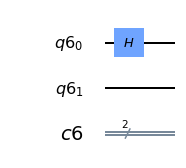

In [41]:
circuit.h(qr[0])#Single qubit Hadamard state?
circuit.draw(output='mpl')

In [42]:
circuit.cx(qr[0], qr[1]) #cx is short for what?
circuit.draw()

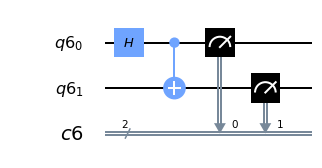

In [43]:
circuit.measure(qr[:],cr[:])
circuit.draw(output='mpl')

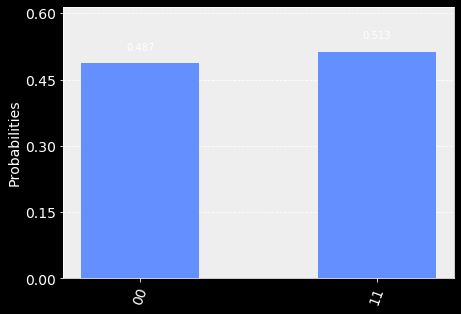

In [48]:
# Execution of quantum circuit on simulated environment.
# It acts as expected.
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

C:\Users\Torbjörn Nilsson\AppData\Local\Programs\Python\Python37\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '
Job Status: job has successfully run


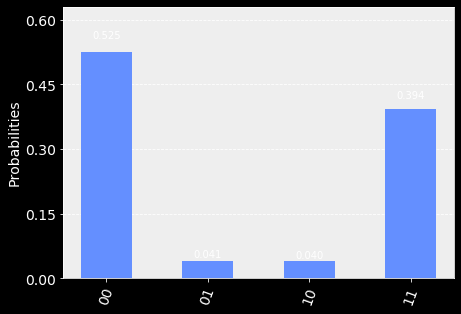

In [51]:
#Let's run a real computer
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit))
IBMQ.disable_account()

In [54]:
#We can finally greet the world
outcome = result.get_counts(circuit)
print(outcome)# As we see, results are stored in a dict. I interpret |1> as spin up. 
if(outcome['11'] > outcome['00']):
    print('Hello upWorld!')
else:
    print('Hello downWorld!')

{'00': 538, '11': 403, '01': 42, '10': 41}
Hello upWorld!


## Hello World in one cell!

In [1]:
from qiskit import *

qr = QuantumRegister(2)# The "register" is our set of qubits
cr = ClassicalRegister(2)# Our set of classical bits
circuit = QuantumCircuit(qr,cr)
circuit.cx(qr[0], qr[1]) 
circuit.measure(qr[:],cr[:])
#circuit.draw(output='mpl') #Enable if you forgot what the circuit looks like
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
outcome = result.get_counts(circuit)
if(outcome['11'] > outcome['00']):
    print('Hello upWorld!')
else:
    print('Hello downWorld!')
IBMQ.disable_account()

Job Status: job has successfully run
Hello downWorld!
